In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
drop_final = ["press_mod","code_presentation", "code_module", "studied_credits"]

def drop_col (df, list):
    df.drop(columns=(list), inplace=True)
    return df


In [2]:
final_df = pd.read_csv("../data/processed/final_df.csv")

In [3]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26721 entries, 0 to 26720
Data columns (total 13 columns):
id_student           26721 non-null int64
age_band             26721 non-null object
gender               26721 non-null object
highest_education    26721 non-null object
n_assignments        26721 non-null int64
mean_score           26702 non-null float64
final_result         26721 non-null object
total_clicks         26721 non-null int64
studied_credits      26721 non-null int64
region               26721 non-null object
code_module          26721 non-null object
code_presentation    26721 non-null object
press_mod            26721 non-null object
dtypes: float64(1), int64(4), object(8)
memory usage: 2.7+ MB


In [4]:
final_df.describe()

,id_student,n_assignments,mean_score,total_clicks,studied_credits
count,2.672100e+04,26721.000000,26702.000000,26721.000000,26721.000000
mean,7.085816e+05,7.747315,72.837888,1792.429812,77.769357
std,5.540723e+05,4.542077,15.560017,2094.342100,39.026739
min,6.516000e+03,0.000000,0.000000,1.000000,30.000000
25%,5.058780e+05,4.000000,64.800000,460.000000,60.000000
50%,5.893270e+05,7.000000,75.727273,1082.000000,60.000000
75%,6.421960e+05,11.000000,84.080357,2383.000000,90.000000
max,2.698588e+06,28.000000,100.000000,28615.000000,630.000000


In [12]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26721 entries, 0 to 26720
Data columns (total 13 columns):
id_student           26721 non-null int64
age_band             26721 non-null object
gender               26721 non-null object
highest_education    26721 non-null object
n_assignments        26721 non-null int64
mean_score           26702 non-null float64
final_result         26721 non-null object
total_clicks         26721 non-null int64
studied_credits      26721 non-null int64
region               26721 non-null object
code_module          26721 non-null object
code_presentation    26721 non-null object
press_mod            26721 non-null object
dtypes: float64(1), int64(4), object(8)
memory usage: 2.7+ MB


In [13]:
final_df.head()

,id_student,age_band,gender,highest_education,n_assignments,mean_score,final_result,total_clicks,studied_credits,region,code_module,code_presentation,press_mod
0,11391,55<=,M,HE Qualification,5,82.0,Pass,934,240,East Anglian Region,AAA,2013J,2013J-AAA
1,28400,35-55,F,HE Qualification,5,66.4,Pass,1435,60,Scotland,AAA,2013J,2013J-AAA
2,31604,35-55,F,A Level or Equivalent,5,76.0,Pass,2158,60,South East Region,AAA,2013J,2013J-AAA
3,32885,0-35,F,Lower Than A Level,5,54.4,Pass,1034,60,West Midlands Region,AAA,2013J,2013J-AAA
4,38053,35-55,M,A Level or Equivalent,5,68.0,Pass,2445,60,Wales,AAA,2013J,2013J-AAA


In [11]:
final_df.highest_education.unique()

array(['HE Qualification', 'A Level or Equivalent', 'Lower Than A Level',
       'Post Graduate Qualification', 'No Formal quals'], dtype=object)

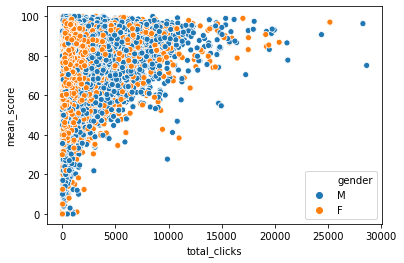

In [6]:
sns.scatterplot(x="total_clicks", y="mean_score", hue = 'gender', data=final_df)

In [7]:
corr = final_df.corr()


In [8]:
corr

,id_student,n_assignments,mean_score,total_clicks,studied_credits
id_student,1.000000,-0.011636,0.025300,0.034431,-0.003123
n_assignments,-0.011636,1.000000,0.281878,0.507772,0.016035
mean_score,0.025300,0.281878,1.000000,0.272873,-0.074452
total_clicks,0.034431,0.507772,0.272873,1.000000,0.018198
studied_credits,-0.003123,0.016035,-0.074452,0.018198,1.000000


In [16]:
drop_col(final_df, drop_final)

,id_student,age_band,gender,highest_education,n_assignments,mean_score,final_result,total_clicks,region
0,11391,55<=,M,HE Qualification,5,82.000000,Pass,934,East Anglian Region
1,28400,35-55,F,HE Qualification,5,66.400000,Pass,1435,Scotland
2,31604,35-55,F,A Level or Equivalent,5,76.000000,Pass,2158,South East Region
3,32885,0-35,F,Lower Than A Level,5,54.400000,Pass,1034,West Midlands Region
4,38053,35-55,M,A Level or Equivalent,5,68.000000,Pass,2445,Wales
...,...,...,...,...,...,...,...,...,...
26716,2620947,0-35,F,A Level or Equivalent,9,88.888889,Distinction,476,Scotland
26717,2645731,35-55,F,Lower Than A Level,9,88.111111,Distinction,893,East Anglian Region
26718,2648187,0-35,F,A Level or Equivalent,9,76.666667,Pass,312,South Region
26719,2679821,35-55,F,Lower Than A Level,2,91.500000,Withdrawn,275,South East Region


In [21]:
final_df.region.unique()

array(['East Anglian Region', 'Scotland', 'South East Region',
       'West Midlands Region', 'Wales', 'North Western Region',
       'North Region', 'South Region', 'Ireland', 'South West Region',
       'East Midlands Region', 'Yorkshire Region', 'London Region'],
      dtype=object)

In [29]:
final_df

,id_student,n_assignments,mean_score,total_clicks,region,age_band_0-35,age_band_35-55,age_band_55<=,gender_F,gender_M,highest_education_A Level or Equivalent,highest_education_HE Qualification,highest_education_Lower Than A Level,highest_education_No Formal quals,highest_education_Post Graduate Qualification,final_result_Distinction,final_result_Fail,final_result_Pass,final_result_Withdrawn
0,11391,5,82.000000,934,East Anglian Region,0,0,1,0,1,0,1,0,0,0,0,0,1,0
1,28400,5,66.400000,1435,Scotland,0,1,0,1,0,0,1,0,0,0,0,0,1,0
2,31604,5,76.000000,2158,South East Region,0,1,0,1,0,1,0,0,0,0,0,0,1,0
3,32885,5,54.400000,1034,West Midlands Region,1,0,0,1,0,0,0,1,0,0,0,0,1,0
4,38053,5,68.000000,2445,Wales,0,1,0,0,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26716,2620947,9,88.888889,476,Scotland,1,0,0,1,0,1,0,0,0,0,1,0,0,0
26717,2645731,9,88.111111,893,East Anglian Region,0,1,0,1,0,0,0,1,0,0,1,0,0,0
26718,2648187,9,76.666667,312,South Region,1,0,0,1,0,1,0,0,0,0,0,0,1,0
26719,2679821,2,91.500000,275,South East Region,0,1,0,1,0,0,0,1,0,0,0,0,0,1


In [30]:
#pd.get_dummies(data=final_df, columns=['age_band', 'gender', 'highest_education', 'final_result'])

In [31]:
final_df.corr()

,id_student,n_assignments,mean_score,total_clicks,age_band_0-35,age_band_35-55,age_band_55<=,gender_F,gender_M,highest_education_A Level or Equivalent,highest_education_HE Qualification,highest_education_Lower Than A Level,highest_education_No Formal quals,highest_education_Post Graduate Qualification,final_result_Distinction,final_result_Fail,final_result_Pass,final_result_Withdrawn
id_student,1.000000,-0.011636,0.025300,0.034431,-0.198901,0.191134,0.049113,0.000015,-0.000015,-0.027392,0.057648,-0.015447,-0.006527,0.009356,0.029150,-0.032534,0.002103,0.007821
n_assignments,-0.011636,1.000000,0.281878,0.507772,-0.018027,0.017661,0.002640,-0.060226,0.060226,0.052924,0.047184,-0.092933,-0.022793,0.038969,0.179852,-0.247092,0.367555,-0.341623
mean_score,0.025300,0.281878,1.000000,0.272873,-0.074201,0.070618,0.021994,0.003537,-0.003537,0.040485,0.065925,-0.095220,-0.041306,0.061006,0.349461,-0.284031,0.179455,-0.205045
total_clicks,0.034431,0.507772,0.272873,1.000000,-0.132369,0.120452,0.068887,-0.182719,0.182719,-0.012033,0.079482,-0.052636,-0.014772,0.041878,0.224131,-0.213749,0.167749,-0.164001
age_band_0-35,-0.198901,-0.018027,-0.074201,-0.132369,1.000000,-0.982773,-0.129850,-0.035438,0.035438,0.112386,-0.134564,-0.003242,0.030676,-0.084374,-0.062391,0.056154,-0.022393,0.019104
age_band_35-55,0.191134,0.017661,0.070618,0.120452,-0.982773,1.000000,-0.055639,0.045353,-0.045353,-0.104310,0.114784,0.010771,-0.029359,0.077882,0.057929,-0.053647,0.022414,-0.018196
age_band_55<=,0.049113,0.002640,0.021994,0.068887,-0.129850,-0.055639,1.000000,-0.051870,0.051870,-0.047536,0.111155,-0.040270,-0.008214,0.037987,0.026276,-0.015553,0.000726,-0.005587
gender_F,0.000015,-0.060226,0.003537,-0.182719,-0.035438,0.045353,-0.051870,1.000000,-1.000000,0.006265,-0.057744,0.038341,0.025440,-0.032501,0.012076,-0.011851,0.036744,-0.042661
gender_M,-0.000015,0.060226,-0.003537,0.182719,0.035438,-0.045353,0.051870,-1.000000,1.000000,-0.006265,0.057744,-0.038341,-0.025440,0.032501,-0.012076,0.011851,-0.036744,0.042661
highest_education_A Level or Equivalent,-0.027392,0.052924,0.040485,-0.012033,0.112386,-0.104310,-0.047536,0.006265,-0.006265,1.000000,-0.380907,-0.703720,-0.085737,-0.093254,0.035918,-0.049622,0.047473,-0.035966


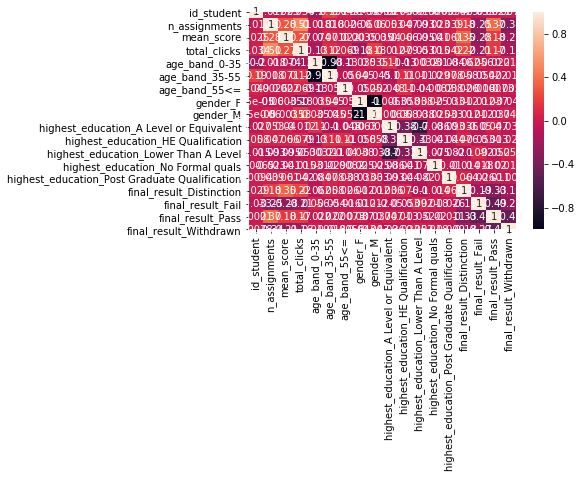

In [38]:
sns.heatmap(corr, annot=True)
plt.show()

In [39]:
#Re-size matrix.